In [1]:
import torch
import torch.nn.functional as F
import torch.nn as nn
from torch.utils.data import Dataset, TensorDataset, DataLoader
import torchvision.transforms as transforms
import numpy as np
from PIL import Image

from lateral_connections import VggLateral, AddGaussianNoise

from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import time
import datetime
import copy
import os

from importlib import reload

m = VggLateral('MNIST')

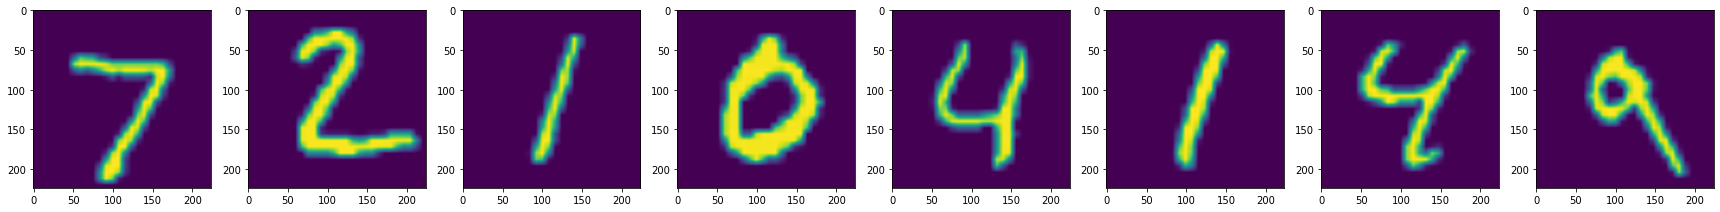

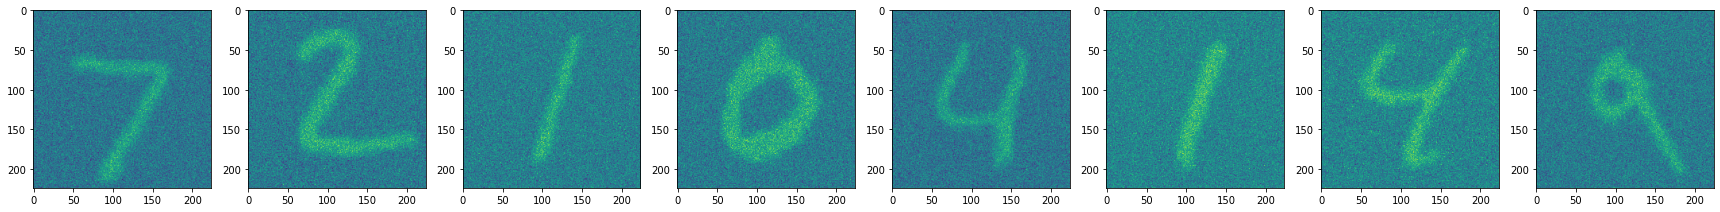

In [2]:
def plot_images(loader):
    imgs, _ = next(iter(loader))
    
    num_images = 8
    fig, axs = plt.subplots(1, num_images, figsize=(3*num_images, 3))
    
    for i in range(num_images):
        axs[i].imshow(imgs[i][0,...])
    
    plt.tight_layout()
    plt.show()
    
    
plot_images(m.test_loader)
plot_images(m.noise_test_loader)

images/mnist_c/pixelate


Evaluating MNIST test data without noise.: 100%|██████████████████████████████████████| 313/313 [00:46<00:00,  6.79it/s]


	Accuracy: 0.9758
MNIST-C 'pixelate':		Accuracy: 0.9758


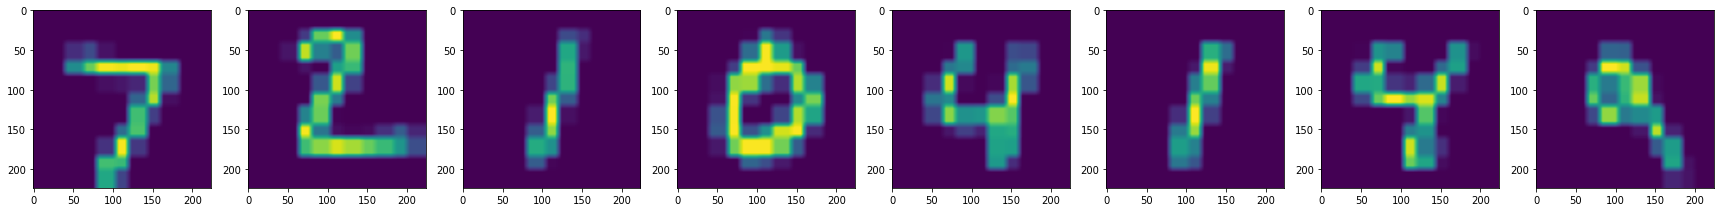

images/mnist_c/dotted_line


Evaluating MNIST test data without noise.: 100%|██████████████████████████████████████| 313/313 [00:46<00:00,  6.68it/s]


	Accuracy: 0.9668
MNIST-C 'dotted_line':		Accuracy: 0.9668


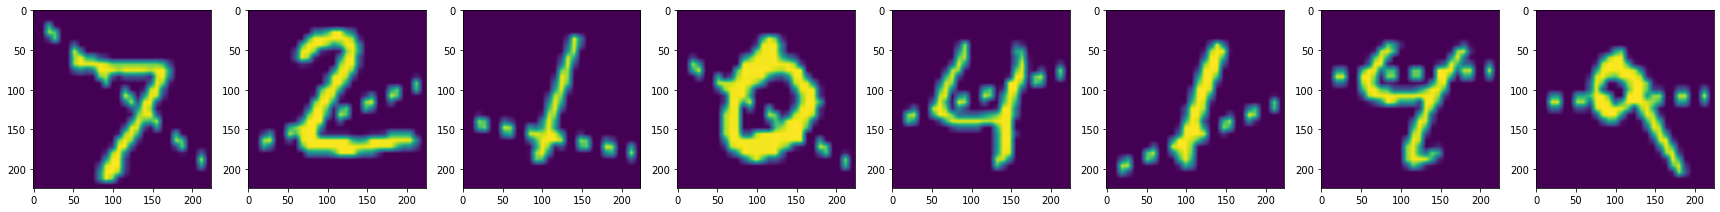

images/mnist_c/gaussian_blur


Evaluating MNIST test data without noise.: 100%|██████████████████████████████████████| 313/313 [00:46<00:00,  6.68it/s]


	Accuracy: 0.9409
MNIST-C 'gaussian_blur':		Accuracy: 0.9409


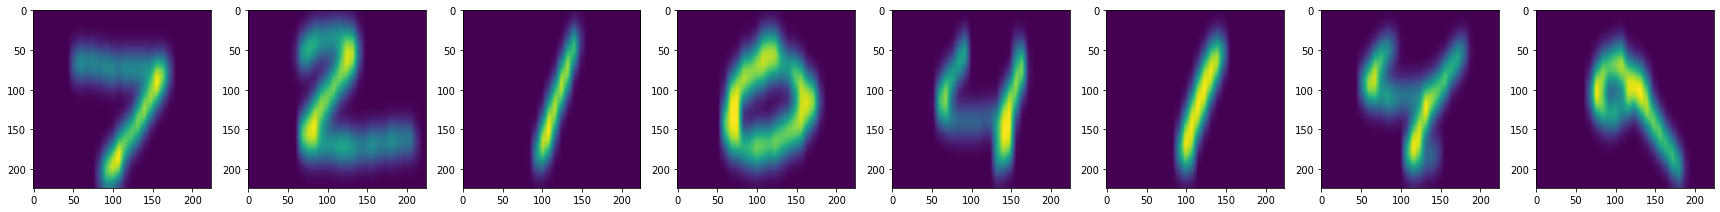

images/mnist_c/elastic_transform


Evaluating MNIST test data without noise.: 100%|██████████████████████████████████████| 313/313 [00:46<00:00,  6.70it/s]


	Accuracy: 0.8962
MNIST-C 'elastic_transform':		Accuracy: 0.8962


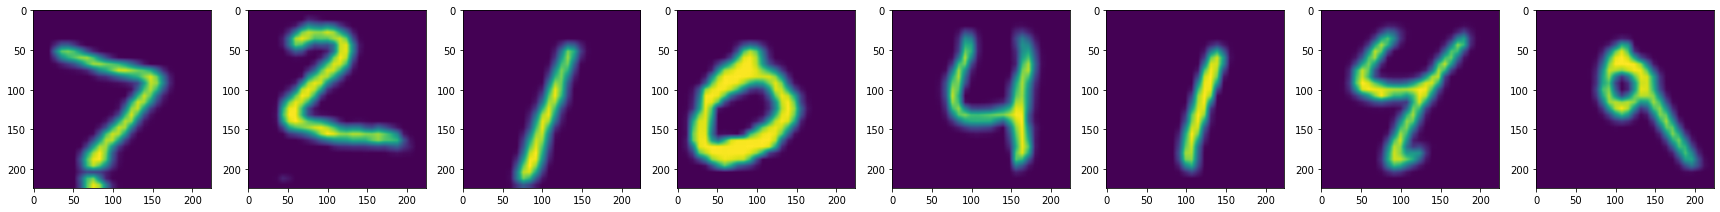

images/mnist_c/jpeg_compression


Evaluating MNIST test data without noise.: 100%|██████████████████████████████████████| 313/313 [00:46<00:00,  6.70it/s]


	Accuracy: 0.9913
MNIST-C 'jpeg_compression':		Accuracy: 0.9913


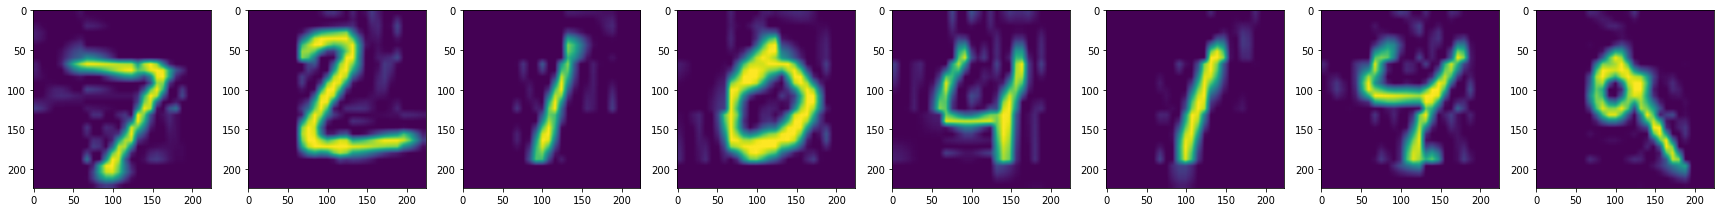

images/mnist_c/speckle_noise


Evaluating MNIST test data without noise.: 100%|██████████████████████████████████████| 313/313 [00:46<00:00,  6.68it/s]


	Accuracy: 0.9863
MNIST-C 'speckle_noise':		Accuracy: 0.9863


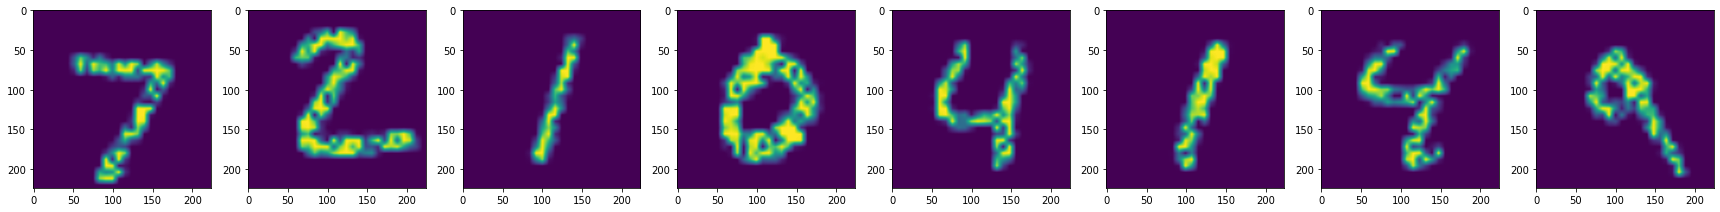

images/mnist_c/identity


Evaluating MNIST test data without noise.: 100%|██████████████████████████████████████| 313/313 [00:46<00:00,  6.69it/s]


	Accuracy: 0.9928
MNIST-C 'identity':		Accuracy: 0.9928


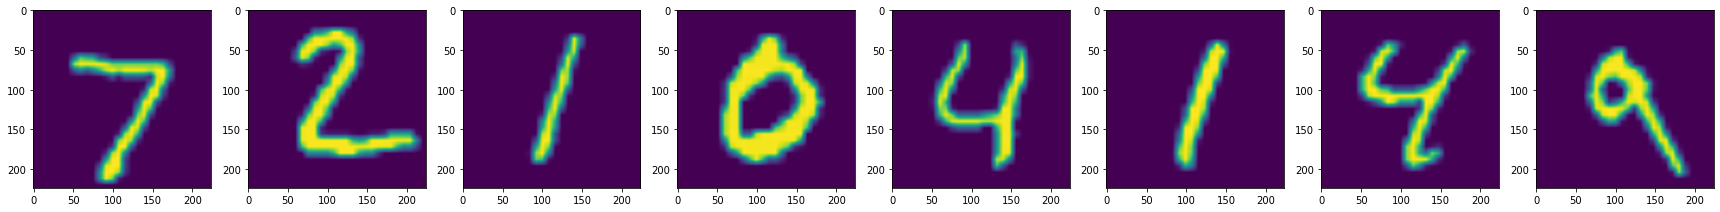

images/mnist_c/glass_blur


Evaluating MNIST test data without noise.: 100%|██████████████████████████████████████| 313/313 [00:46<00:00,  6.67it/s]


	Accuracy: 0.9640
MNIST-C 'glass_blur':		Accuracy: 0.9640


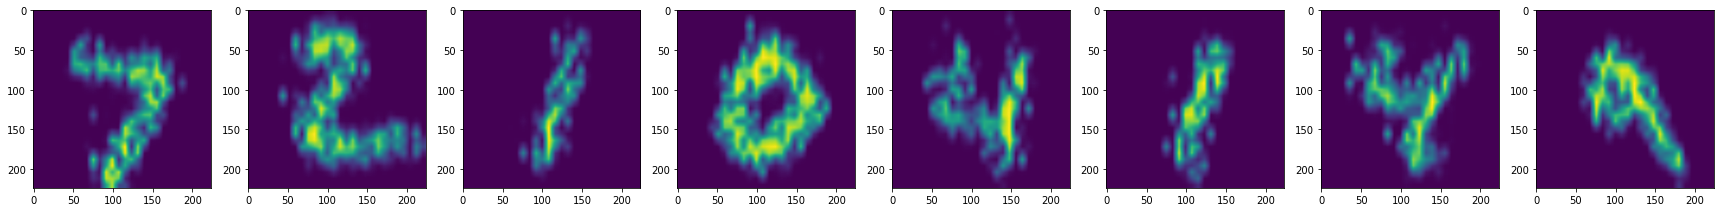

images/mnist_c/spatter


Evaluating MNIST test data without noise.: 100%|██████████████████████████████████████| 313/313 [00:46<00:00,  6.68it/s]


	Accuracy: 0.9692
MNIST-C 'spatter':		Accuracy: 0.9692


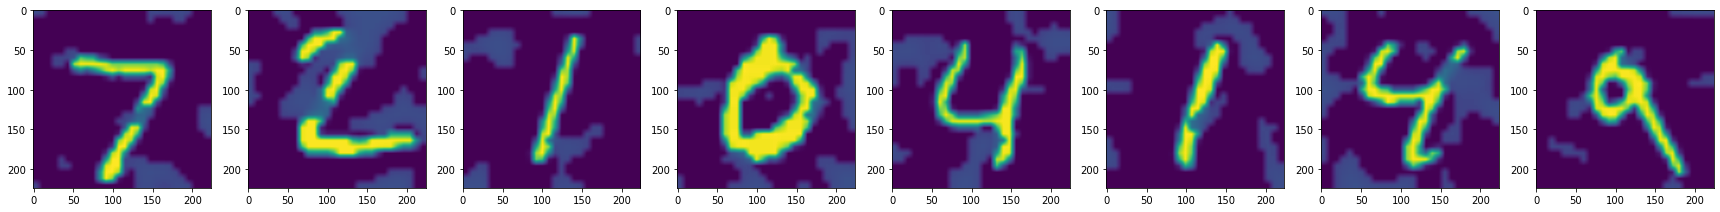

images/mnist_c/translate


Evaluating MNIST test data without noise.: 100%|██████████████████████████████████████| 313/313 [00:46<00:00,  6.70it/s]


	Accuracy: 0.6218
MNIST-C 'translate':		Accuracy: 0.6218


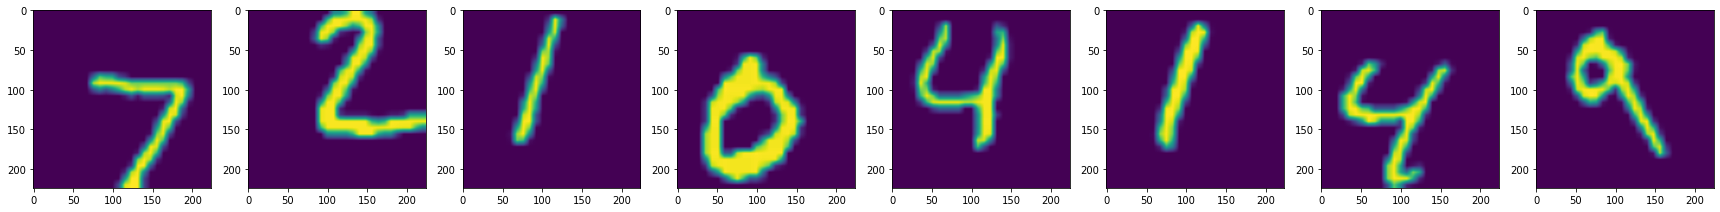

images/mnist_c/fog


Evaluating MNIST test data without noise.: 100%|██████████████████████████████████████| 313/313 [00:46<00:00,  6.67it/s]


	Accuracy: 0.9857
MNIST-C 'fog':		Accuracy: 0.9857


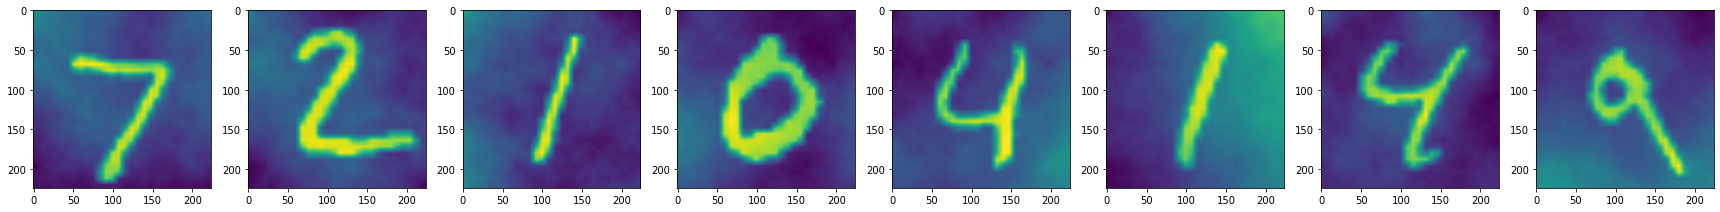

images/mnist_c/shear


Evaluating MNIST test data without noise.: 100%|██████████████████████████████████████| 313/313 [00:46<00:00,  6.67it/s]


	Accuracy: 0.9798
MNIST-C 'shear':		Accuracy: 0.9798


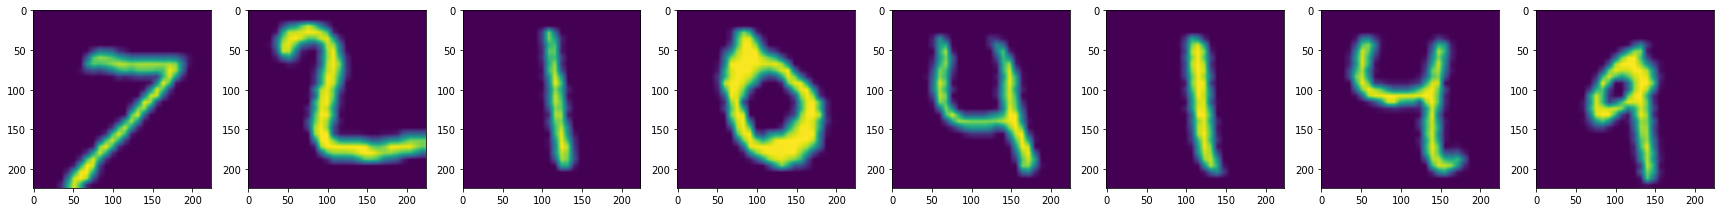

images/mnist_c/scale


Evaluating MNIST test data without noise.: 100%|██████████████████████████████████████| 313/313 [00:46<00:00,  6.68it/s]


	Accuracy: 0.9620
MNIST-C 'scale':		Accuracy: 0.9620


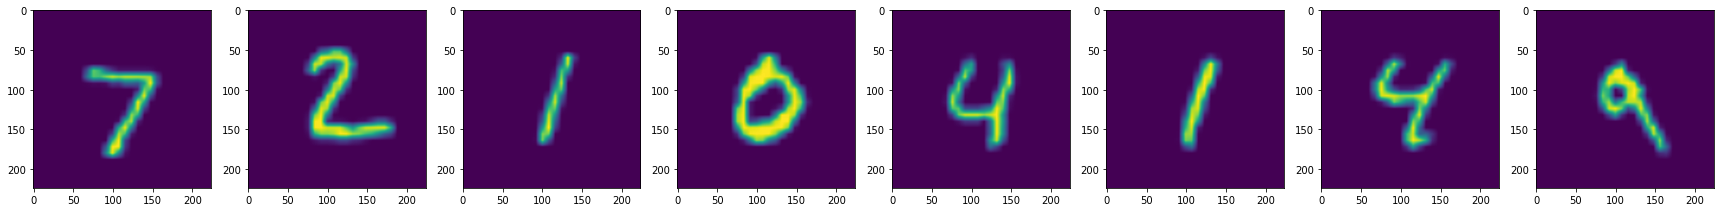

images/mnist_c/zigzag


Evaluating MNIST test data without noise.: 100%|██████████████████████████████████████| 313/313 [00:46<00:00,  6.67it/s]


	Accuracy: 0.9231
MNIST-C 'zigzag':		Accuracy: 0.9231


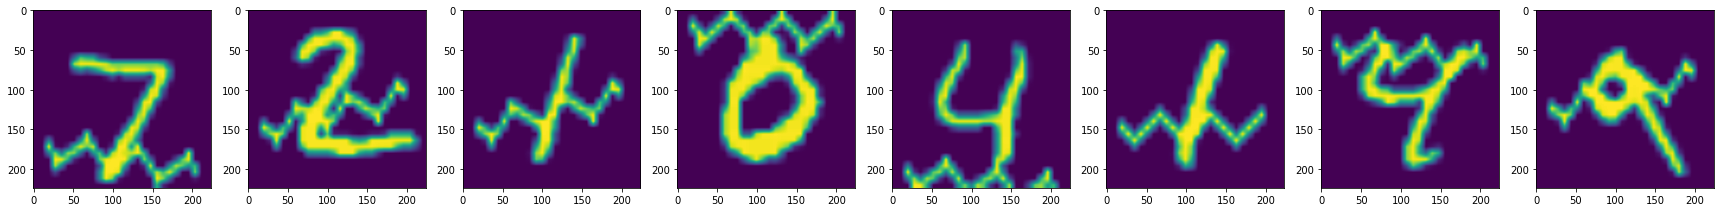

images/mnist_c/defocus_blur


Evaluating MNIST test data without noise.: 100%|██████████████████████████████████████| 313/313 [00:46<00:00,  6.68it/s]


	Accuracy: 0.9630
MNIST-C 'defocus_blur':		Accuracy: 0.9630


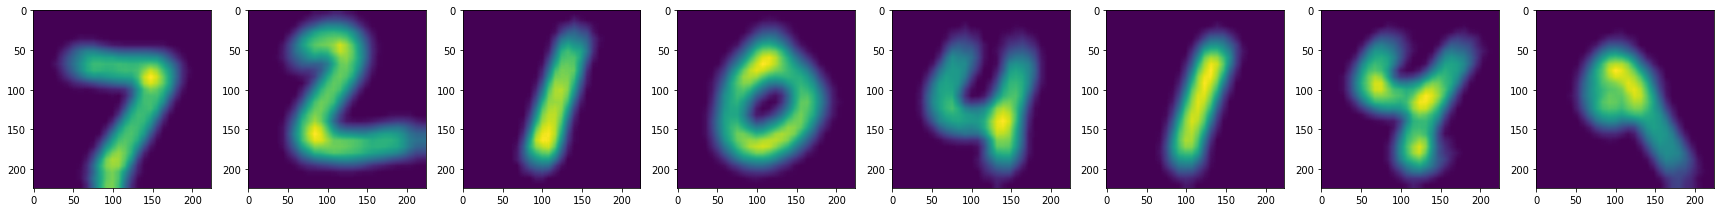

images/mnist_c/gaussian_noise


Evaluating MNIST test data without noise.: 100%|██████████████████████████████████████| 313/313 [00:47<00:00,  6.58it/s]


	Accuracy: 0.9702
MNIST-C 'gaussian_noise':		Accuracy: 0.9702


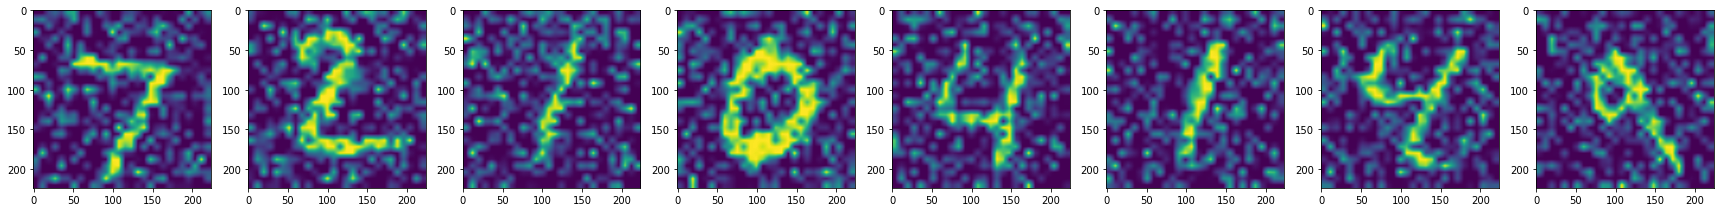

images/mnist_c/contrast


Evaluating MNIST test data without noise.: 100%|██████████████████████████████████████| 313/313 [00:46<00:00,  6.66it/s]


	Accuracy: 0.9899
MNIST-C 'contrast':		Accuracy: 0.9899


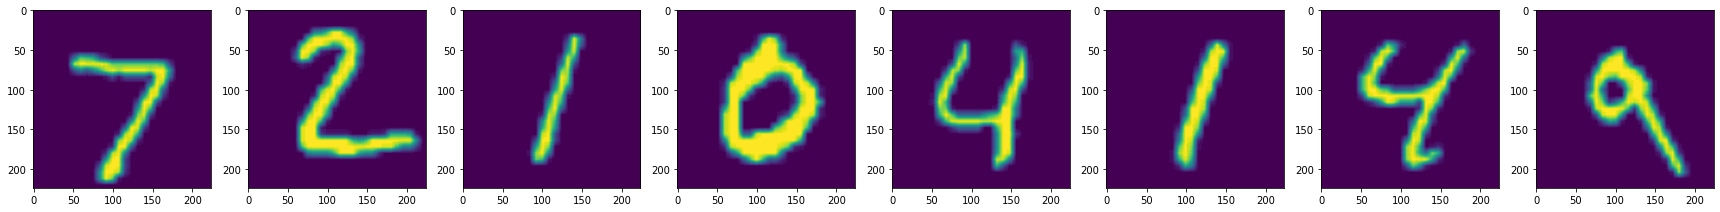

images/mnist_c/canny_edges


Evaluating MNIST test data without noise.: 100%|██████████████████████████████████████| 313/313 [00:47<00:00,  6.66it/s]


	Accuracy: 0.7973
MNIST-C 'canny_edges':		Accuracy: 0.7973


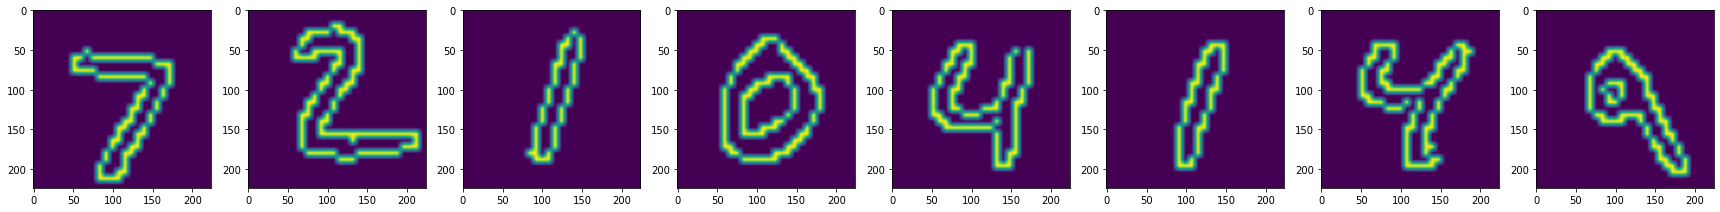

images/mnist_c/zoom_blur


Evaluating MNIST test data without noise.: 100%|██████████████████████████████████████| 313/313 [00:47<00:00,  6.61it/s]


	Accuracy: 0.9780
MNIST-C 'zoom_blur':		Accuracy: 0.9780


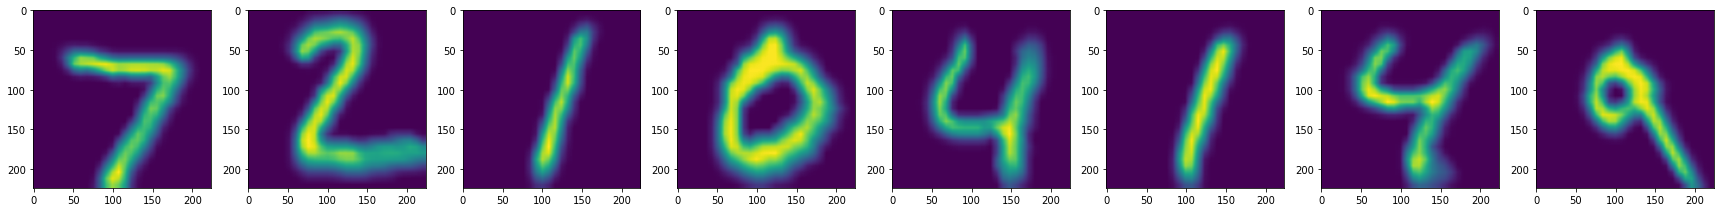

images/mnist_c/line


Evaluating MNIST test data without noise.: 100%|██████████████████████████████████████| 313/313 [00:46<00:00,  6.68it/s]


	Accuracy: 0.8876
MNIST-C 'line':		Accuracy: 0.8876


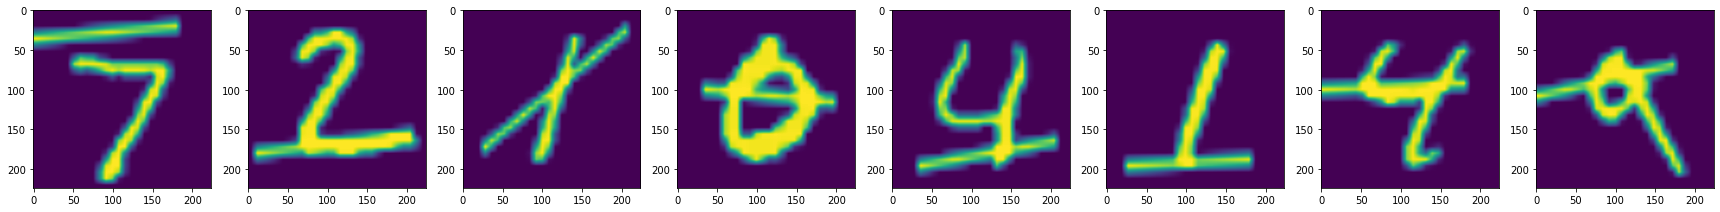

images/mnist_c/pessimal_noise


Evaluating MNIST test data without noise.: 100%|██████████████████████████████████████| 313/313 [00:47<00:00,  6.65it/s]


	Accuracy: 0.9482
MNIST-C 'pessimal_noise':		Accuracy: 0.9482


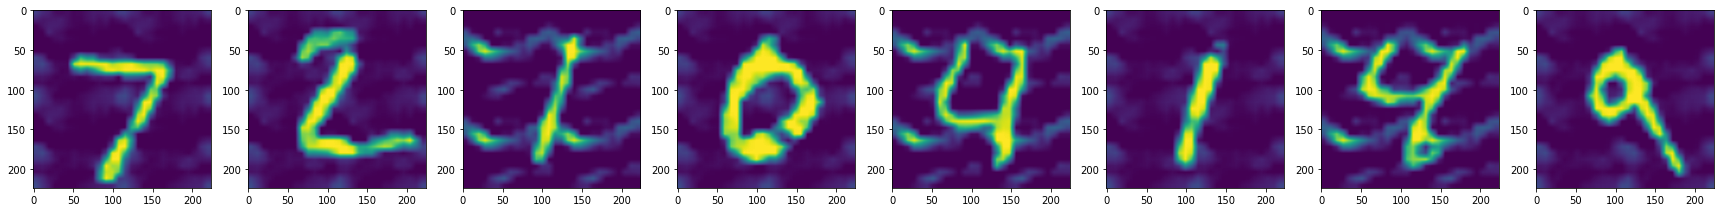

images/mnist_c/rotate


Evaluating MNIST test data without noise.: 100%|██████████████████████████████████████| 313/313 [00:46<00:00,  6.69it/s]


	Accuracy: 0.9365
MNIST-C 'rotate':		Accuracy: 0.9365


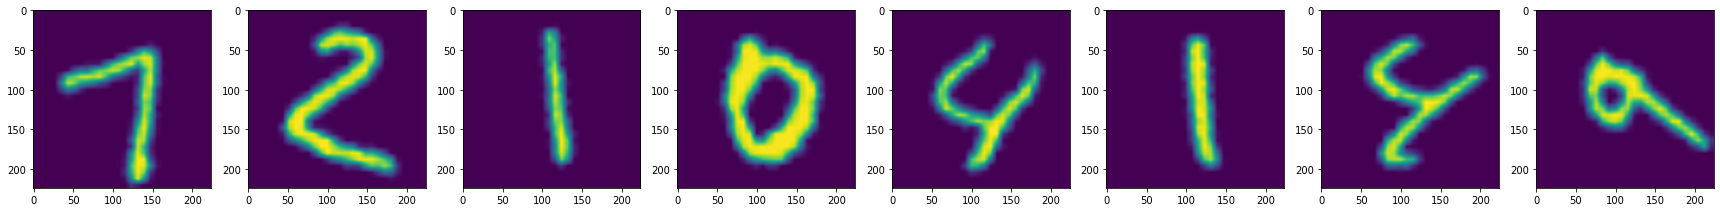

images/mnist_c/brightness


Evaluating MNIST test data without noise.: 100%|██████████████████████████████████████| 313/313 [00:46<00:00,  6.67it/s]


	Accuracy: 0.9896
MNIST-C 'brightness':		Accuracy: 0.9896


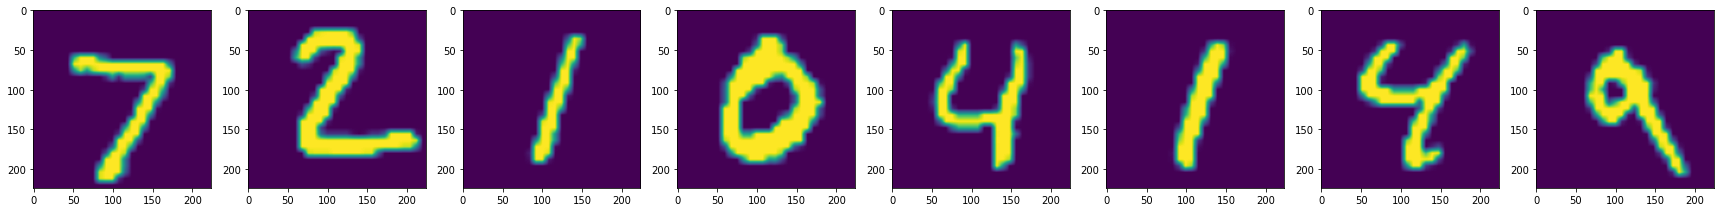

images/mnist_c/shot_noise


Evaluating MNIST test data without noise.: 100%|██████████████████████████████████████| 313/313 [00:46<00:00,  6.67it/s]


	Accuracy: 0.9839
MNIST-C 'shot_noise':		Accuracy: 0.9839


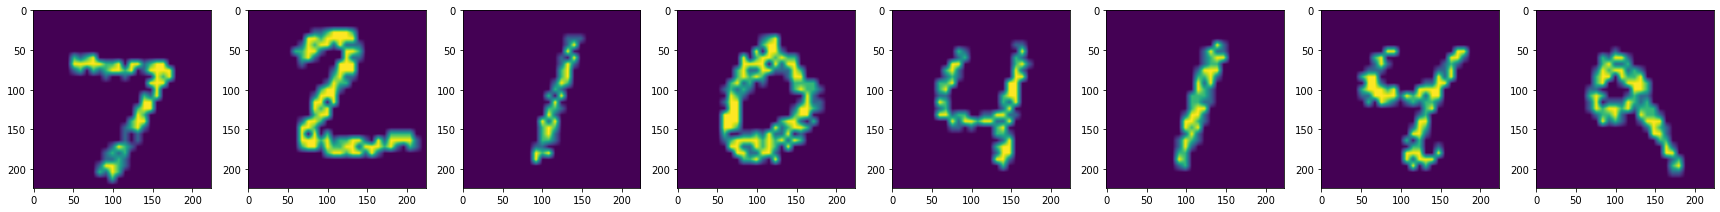

images/mnist_c/saturate


Evaluating MNIST test data without noise.: 100%|██████████████████████████████████████| 313/313 [00:46<00:00,  6.69it/s]


	Accuracy: 0.9858
MNIST-C 'saturate':		Accuracy: 0.9858


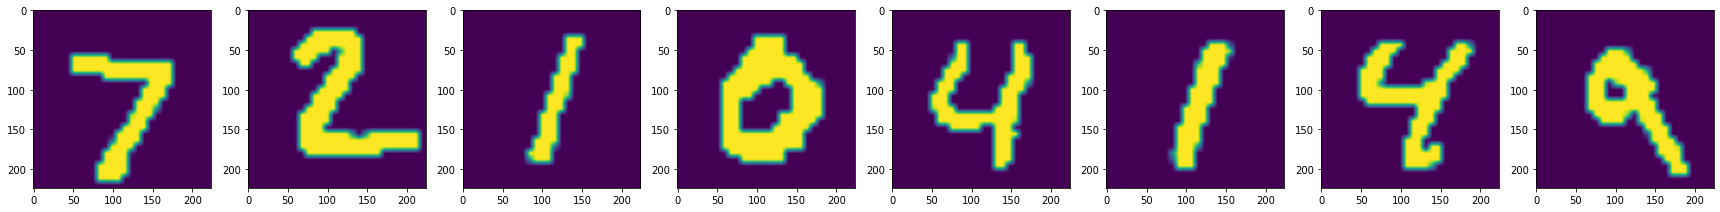

images/mnist_c/motion_blur


Evaluating MNIST test data without noise.: 100%|██████████████████████████████████████| 313/313 [00:46<00:00,  6.67it/s]


	Accuracy: 0.9384
MNIST-C 'motion_blur':		Accuracy: 0.9384


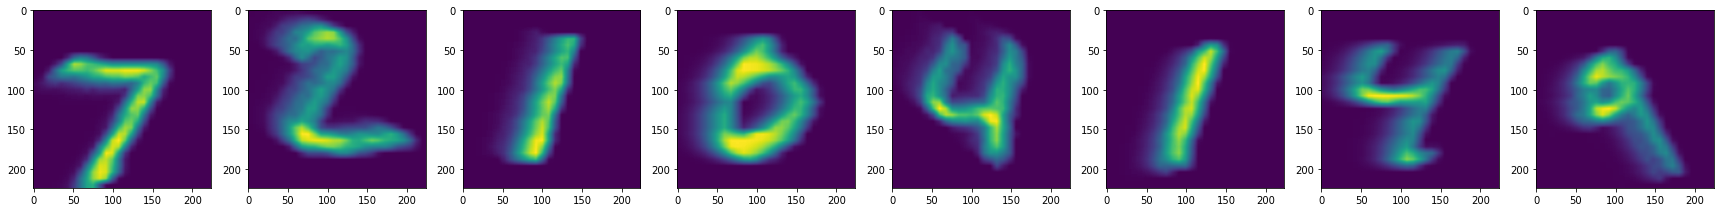

images/mnist_c/snow


Evaluating MNIST test data without noise.: 100%|██████████████████████████████████████| 313/313 [00:46<00:00,  6.68it/s]


	Accuracy: 0.9849
MNIST-C 'snow':		Accuracy: 0.9849


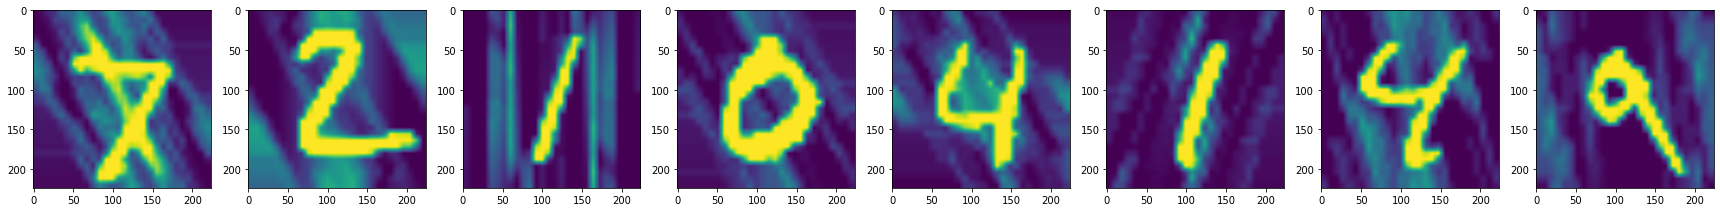

images/mnist_c/inverse


Evaluating MNIST test data without noise.: 100%|██████████████████████████████████████| 313/313 [00:46<00:00,  6.69it/s]


	Accuracy: 0.3090
MNIST-C 'inverse':		Accuracy: 0.3090


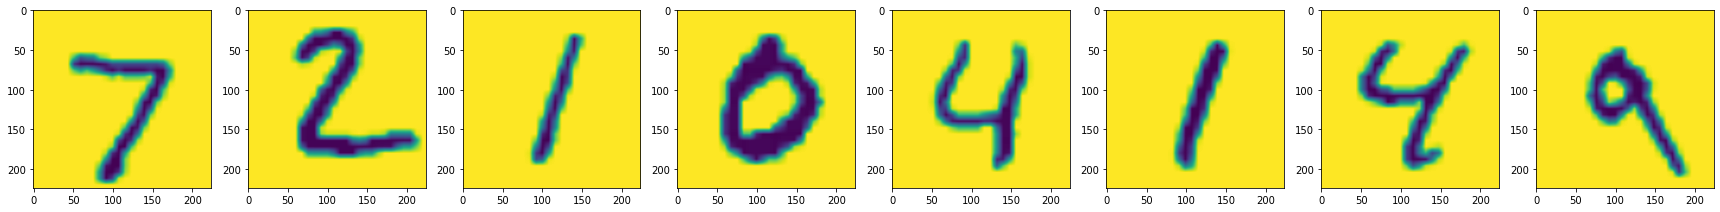

images/mnist_c/impulse_noise


Evaluating MNIST test data without noise.: 100%|██████████████████████████████████████| 313/313 [00:47<00:00,  6.65it/s]


	Accuracy: 0.9590
MNIST-C 'impulse_noise':		Accuracy: 0.9590


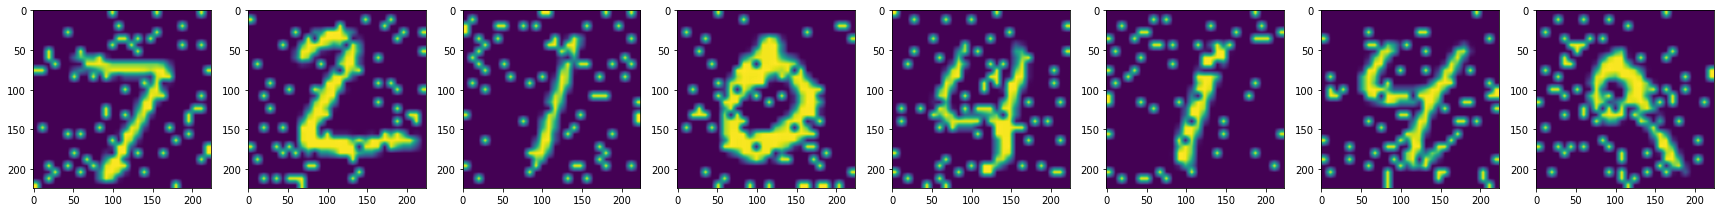

images/mnist_c/stripe


Evaluating MNIST test data without noise.: 100%|██████████████████████████████████████| 313/313 [00:46<00:00,  6.69it/s]


	Accuracy: 0.8976
MNIST-C 'stripe':		Accuracy: 0.8976


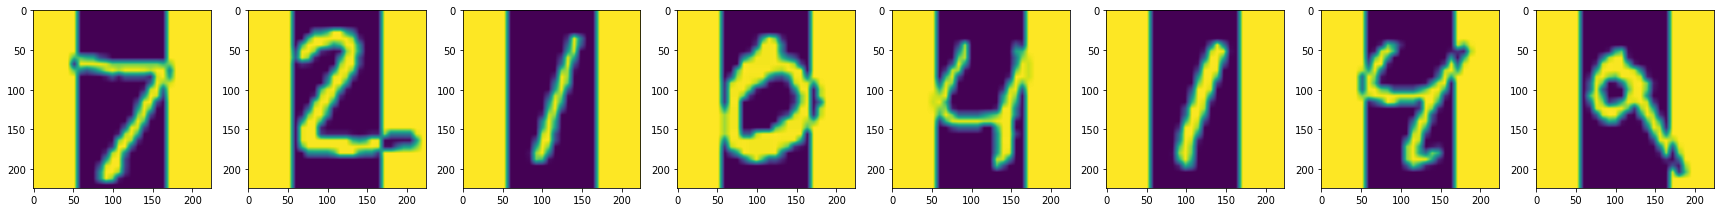

images/mnist_c/quantize


Evaluating MNIST test data without noise.: 100%|██████████████████████████████████████| 313/313 [00:46<00:00,  6.69it/s]


	Accuracy: 0.9919
MNIST-C 'quantize':		Accuracy: 0.9919


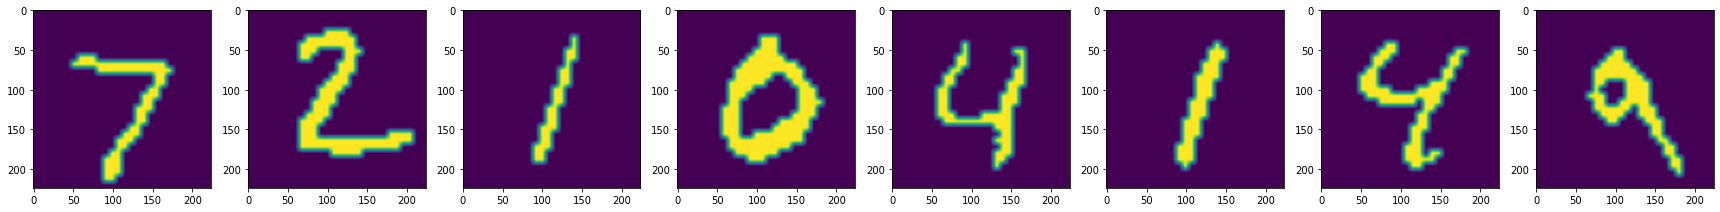

images/mnist_c/frost


Evaluating MNIST test data without noise.: 100%|██████████████████████████████████████| 313/313 [00:46<00:00,  6.68it/s]


	Accuracy: 0.9852
MNIST-C 'frost':		Accuracy: 0.9852


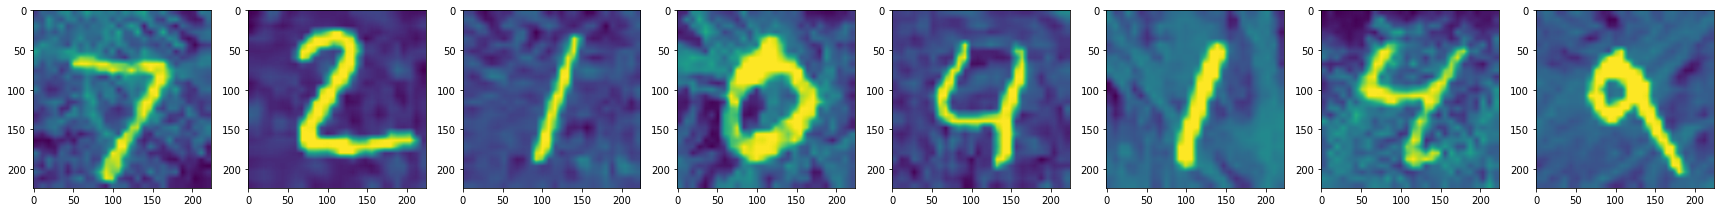

In [14]:
def test_mnist_c(path):
    print(path)
    
class MNIST_C_Dataset(Dataset):
    def __init__(self, data, targets, transform=None):
        self.data = data
        self.targets = torch.LongTensor(targets)
        self.transform = transform
        
    def __getitem__(self, index):
        x = self.data[index]
        y = self.targets[index]
        
        if self.transform:
            x = Image.fromarray(self.data[index], mode='L')
            x = self.transform(x)
            
        return x,y

    def __len__(self):
        return len(self.data)

for root, dirs, files in os.walk('images/mnist_c/'):
    if len(dirs) == 0:
        dirname = root.split('/')[-1]
        
        imgs = np.load(root + '/test_images.npy')
        imgs = imgs.transpose(0, 3, 1, 2)[:,0,...]
        lbls = np.load(root + '/test_labels.npy').reshape((10000,))
        
        # Transform Preprocessing
        ds = MNIST_C_Dataset(imgs, lbls, transform=m.pretrained_vgg.test_transform)
        dl = DataLoader(ds, batch_size=32, shuffle=False)
        
        acc = m.test(False, dl)
        print(f"MNIST-C '{dirname}':\t\tAccuracy: {acc:1.4f}")
        
        plot_images(dl)

In [15]:
corrupted_accuracies = {
    'pixelate': 0.9758,
    'dotted_line': 0.9668,
    'gaussian_blur': 0.9409,
    'elastic_transform': 0.8962,
    'jpeg_compression': 0.9913,
    'speckle_noise': 0.9863,
    'identity': 0.9928,
    'spatter': 0.9640,
    'translate': 0.6218,
    'fog': 0.9857,
    'shear': 0.9798,
    'scale': 0.9620,
    'zigzag': 0.9231,
    'defocus_blur': 0.9630,
    'gaussian_noise': 0.9702,
    'contrast': 0.9899,
    'canny_edges': 0.7973,
    'zoom_blur': 0.9780,
    'line': 0.8876,
    'pessimal_noise': 0.9482,
    'rotate': 0.9365,
    'brightness': 0.9896,
    'shot_noise': 0.9839,
    'saturate': 0.9858,
    'motion_blur': 0.9384,
    'snow': 0.9849,
    'inverse': 0.3090,
    'impulse_noise': 0.9590,
    'stripe': 0.8976,
    'quantize': 0.9919,
    'frost': 0.9852,
}

In [117]:
import pandas as pd

df = pd.DataFrame(corrupted_accuracies.items(), columns=['corruption','accuracy'])
df = df.sort_values(['accuracy']).reset_index(drop=True)
df['difference'] = - (df.iloc[30]['accuracy'] - df['accuracy'])
df = df.sort_values(['accuracy'], ascending=False)
df = df.reset_index(drop=True)
df.head()

corruption  accuracy  difference
0          identity    0.9928     -0.0000
1          quantize    0.9919     -0.0009
2  jpeg_compression    0.9913     -0.0015
3          contrast    0.9899     -0.0029
4        brightness    0.9896     -0.0032

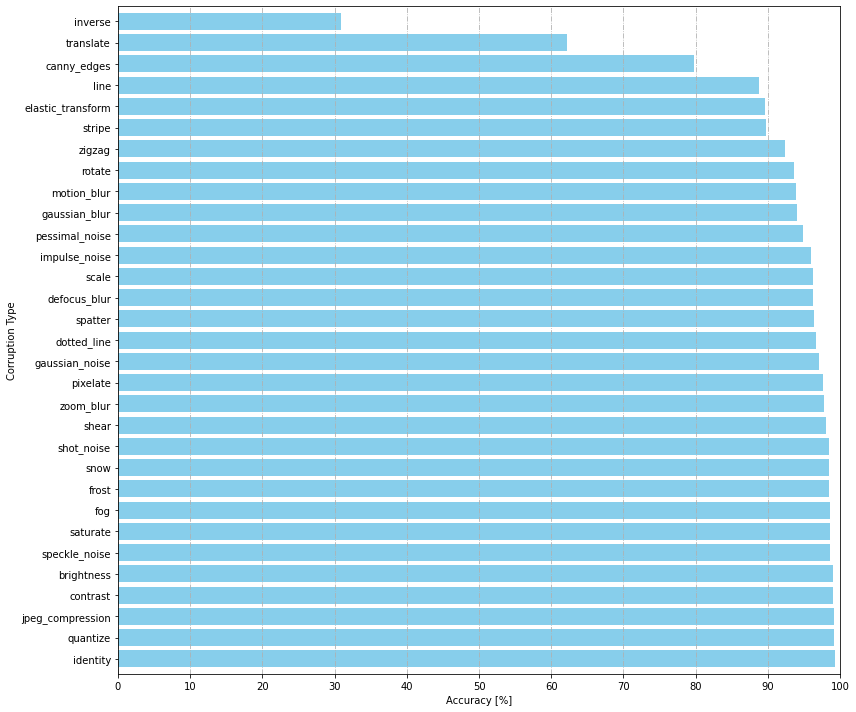

In [104]:
fig, ax = plt.subplots(figsize=(12, 10))
ax.set_xlim(0, 100)

labels = list(df['corruption'])
data = list(df['accuracy'] * 100) 

ax.grid(axis='x', linestyle='-.')
#ax.set_axisbelow(True)

ax.barh(labels, data, color='skyblue')
    
ax.set_xlabel('Accuracy [%]')
ax.set_ylabel('Corruption Type')
ax.xaxis.set_ticks(np.arange(0, 110, 10))

plt.margins(y=0.01)
plt.tight_layout()
plt.show()

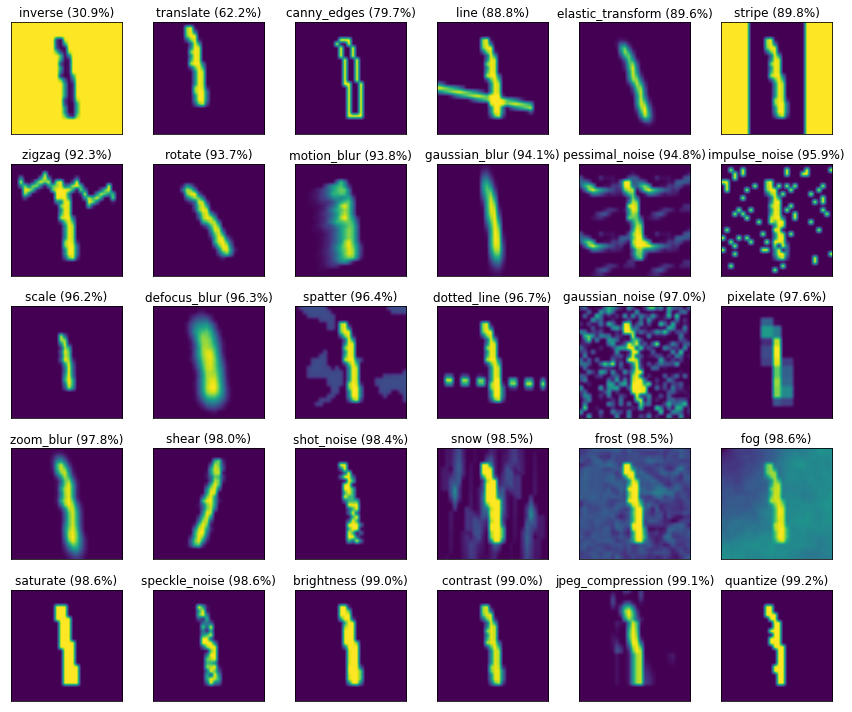

In [119]:
labels = list(df['corruption'])
data = list(df['accuracy'] * 100) 

fig, axs = plt.subplots(5, 6, figsize=(12, 10))

for x in range(5):
    for y in range(6):
        i = 30 - y - 6*x
        
        root = 'images/mnist_c/' + labels[i]
        imgs = np.load(root + '/test_images.npy')
        imgs = imgs.transpose(0, 3, 1, 2)[:,0,...]
        lbls = np.load(root + '/test_labels.npy').reshape((10000,))
        
        # Transform Preprocessing
        ds = MNIST_C_Dataset(imgs, lbls, transform=m.pretrained_vgg.test_transform)
        img, _ = ds[29]
        
        axs[x,y].set_title(f"{labels[i]} ({data[i]:3.1f}%)")
        axs[x,y].imshow(img[0,...])
        axs[x,y].set_xticks([])
        axs[x,y].set_yticks([])

plt.tight_layout()
plt.show()